In [10]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from pprint import pprint
import persim

In [9]:
def read_intervals(filename):
    lines = []
    with open(filename,"r") as f:
        lines = [l.strip() for l in f.readlines()]

    dim = 0
    intervals = [[] for i in range(4)]
    for line in lines:
        if line.startswith("Dimension:"):
            dim = int(line.split(": ")[1])
        else:
            bounds = line.strip("[]()").split(", ")
            if bounds[1] == "infinity":
                bounds[1] = np.inf
                bounds[0] = float(bounds[0])
            else:
                bounds[0] = float(bounds[0])
                bounds[1] = float(bounds[1])
            intervals[dim].append(np.array(bounds))
    return intervals

In [57]:
filename = "/Users/egor/Desktop/intervals_test"
intervals = read_intervals(filename)

In [58]:
intervals_word2vec = read_intervals(filename)
intervals_glove_wiki = read_intervals(filename)
intervals_glove_cc = read_intervals(filename)
intervals_elmo = read_intervals(filename)
intervals_bert = read_intervals(filename)

In [75]:
matplotlib.rcParams['figure.figsize'] = 4,5

In [67]:
import ripser
test_cloud = np.load("/Users/egor/Desktop/word_vec_homology/test_bert.npy")

In [70]:
%%time
dgms = ripser.ripser(test_cloud, maxdim = 3)['dgms']

/Users/egor/virtualenvs/cs224project/lib/python3.7/site-packages/ripser/ripser.py:220: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  "The input point cloud has more columns than rows; "


CPU times: user 3min 45s, sys: 21.2 s, total: 4min 6s
Wall time: 4min 8s


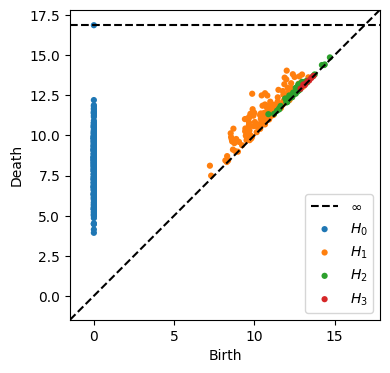

In [76]:
persim.plot_diagrams(dgms, show=True)

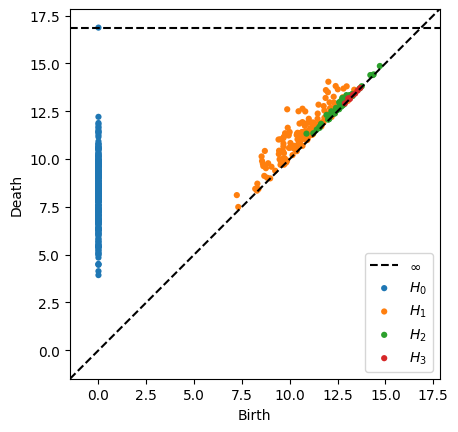

In [80]:
p = persim.plot_diagrams(dgms)